<a href="https://colab.research.google.com/github/aimlresearcher/AI-COURSE/blob/main/05_IDDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iterative Deepening Depth-First Search (IDDFS)
- Starts with depth limit = 0 and runs DLS.
- If the goal is found, it returns the path.
- If "Cutoff" occurs, it increases the depth limit and tries again.
- Stops when goal is found or max depth is reached.

In [1]:
# Iterative Deepening Depth-First Search (IDDFS) Implementation
def iterative_deepening_dfs(graph, start, goal, max_depth):
    for depth in range(max_depth + 1):  # Gradually increase depth limit
        print(f"\n🔍 Searching with depth limit: {depth}")
        result = depth_limited_search(graph, start, goal, depth)
        if result == "Cutoff":
            continue  # Increase depth if goal might be deeper
        elif result is not None:
            return result  # Return the found path
    return None  # Goal not found within max depth

# Depth-Limited Search (DLS) using an iterative approach
def depth_limited_search(graph, start, goal, limit):
    stack = [(start, [start], 0)]  # (node, path, depth)
    visited = set()

    while stack:
        current, path, depth = stack.pop()
        visited.add(current)

        if current == goal:
            return path  # Goal found

        if depth < limit:  # Check depth limit
            for neighbor in reversed(graph.get(current, [])):  # Reverse for correct DFS order
                if neighbor not in path:  # Prevent cycles
                    stack.append((neighbor, path + [neighbor], depth + 1))

    return "Cutoff" if any(depth == limit for _, _, depth in stack) else None  # Return Cutoff or Failure


# Define the graph as an adjacency list
graph = {
    'S': ['E', 'H', 'I'],
    'A': ['B', 'D'],
    'B': ['A', 'E', 'C'],
    'C': ['B', 'F'],
    'D': ['A', 'E'],
    'E': ['B', 'D', 'F'],
    'F': ['J', 'I', 'E'],
    'G': ['D', 'H', 'N'],
    'H': ['S', 'K', 'G'],
    'I': ['S', 'K', 'L', 'F'],
    'J': ['F', 'L'],
    'K': ['I', 'H', 'M', 'N'],
    'L': ['I', 'J', 'M'],
    'M': ['L', 'K'],
    'N': ['K', 'G']
}

# Define start, goal, and max depth
start_node = "S"
goal_node = "A"
max_depth = 5  # Adjust the max depth limit

# Run IDDFS
iddfs_result = iterative_deepening_dfs(graph, start_node, goal_node, max_depth)

# Print the result
if iddfs_result is None:
    print("\nIDDFS Result: Goal not found within the max depth limit")
else:
    print("\nIDDFS Path Found:", " → ".join(iddfs_result))



🔍 Searching with depth limit: 0

🔍 Searching with depth limit: 1

🔍 Searching with depth limit: 2

🔍 Searching with depth limit: 3

IDDFS Path Found: S → E → B → A


# How IDDFS Works in This Visualization
- Starts with depth limit = 0 and runs Depth-Limited Search (DLS).
- If the goal is found, it returns the path.
- If "Cutoff" occurs, it increases the depth limit and tries again.
- Stops when goal is found or max depth is reached.


🔍 Searching with depth limit: 0


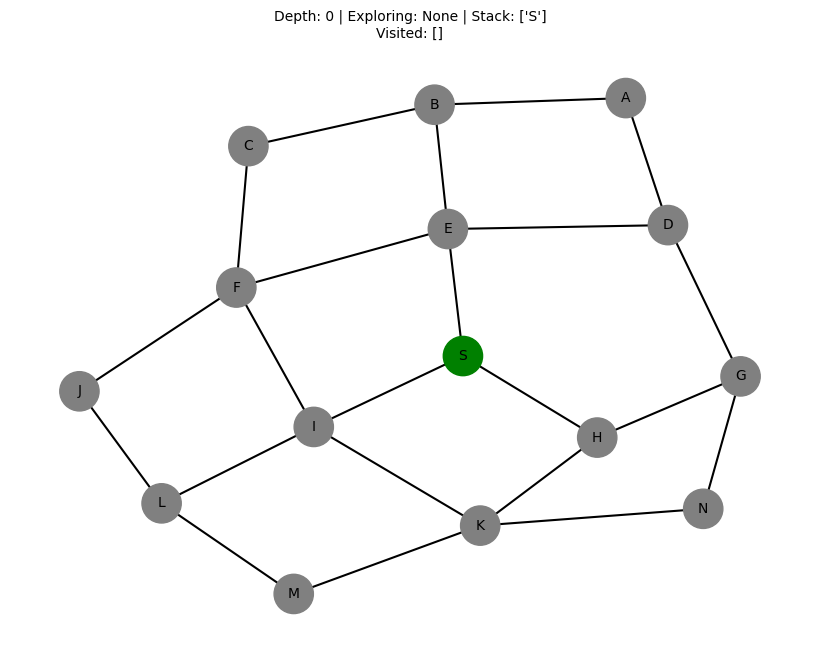

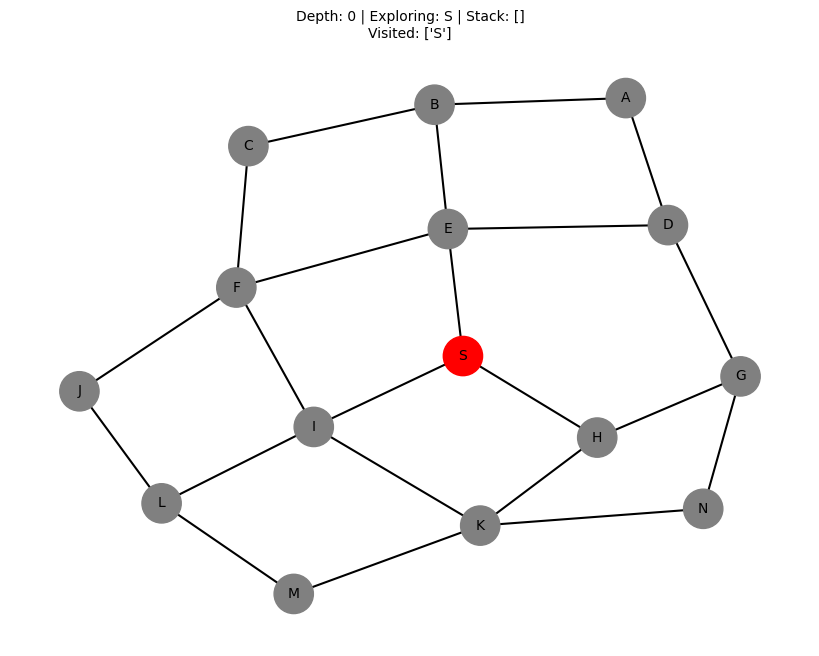

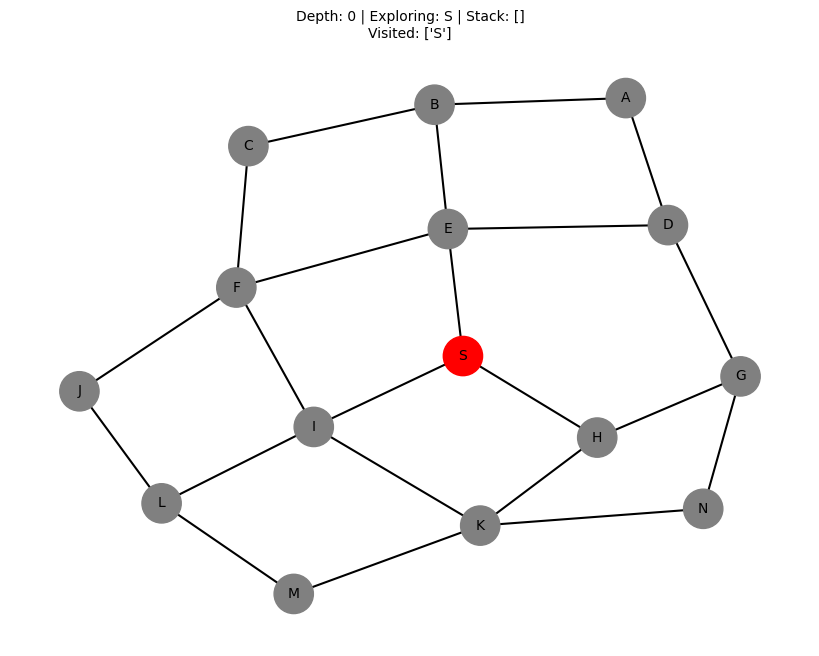


🔍 Searching with depth limit: 1


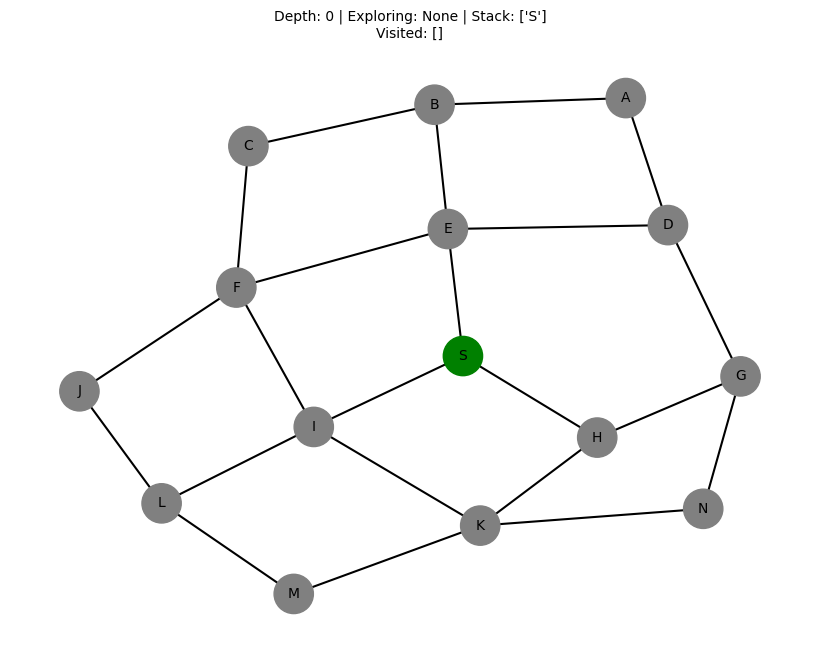

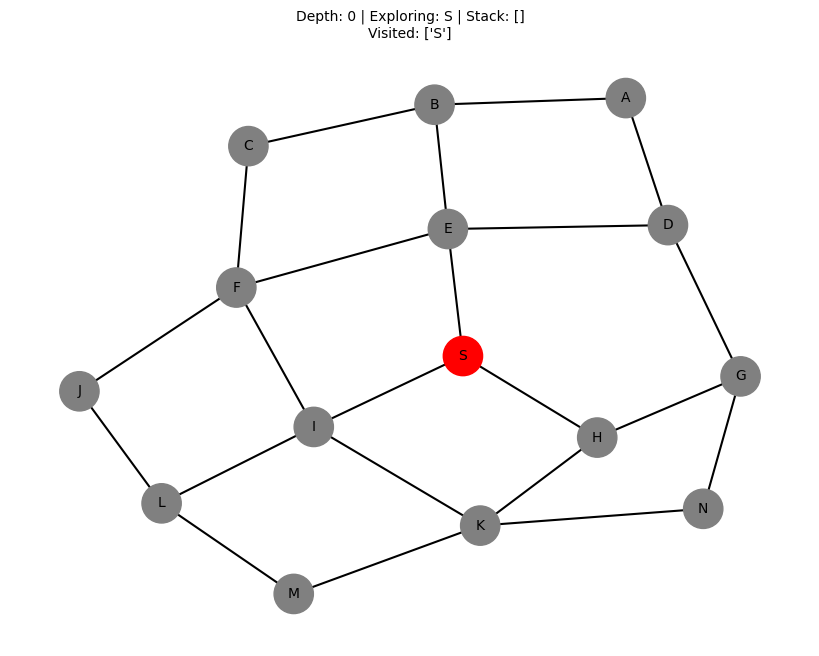

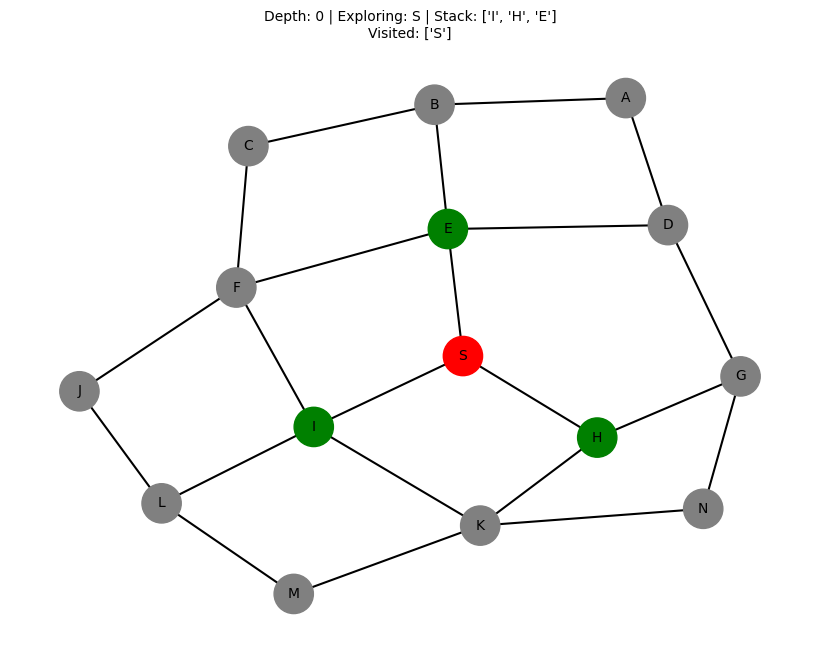

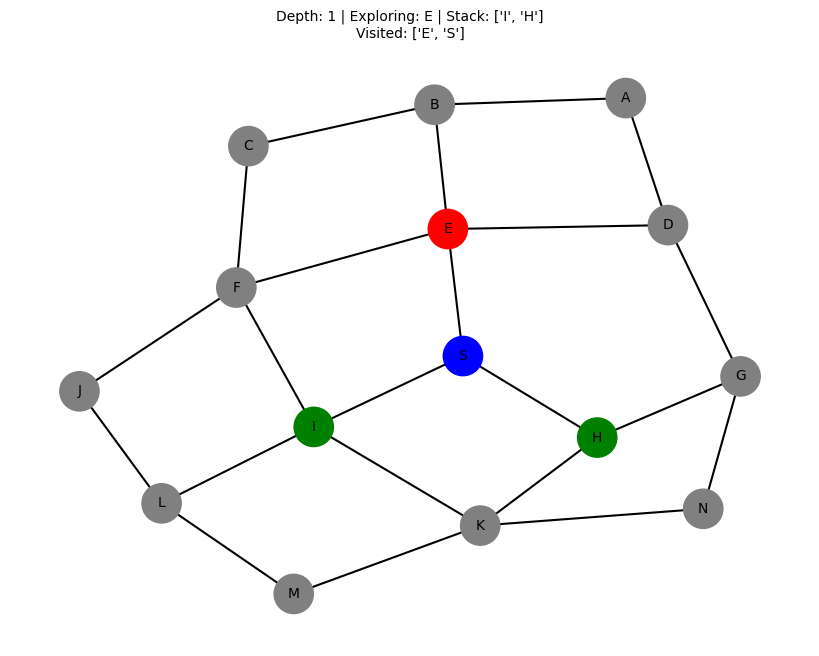

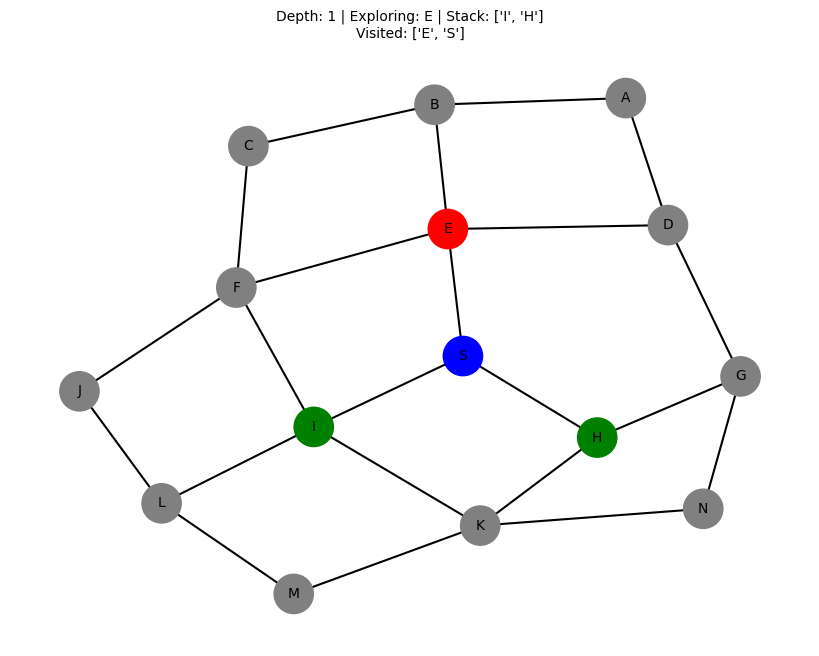

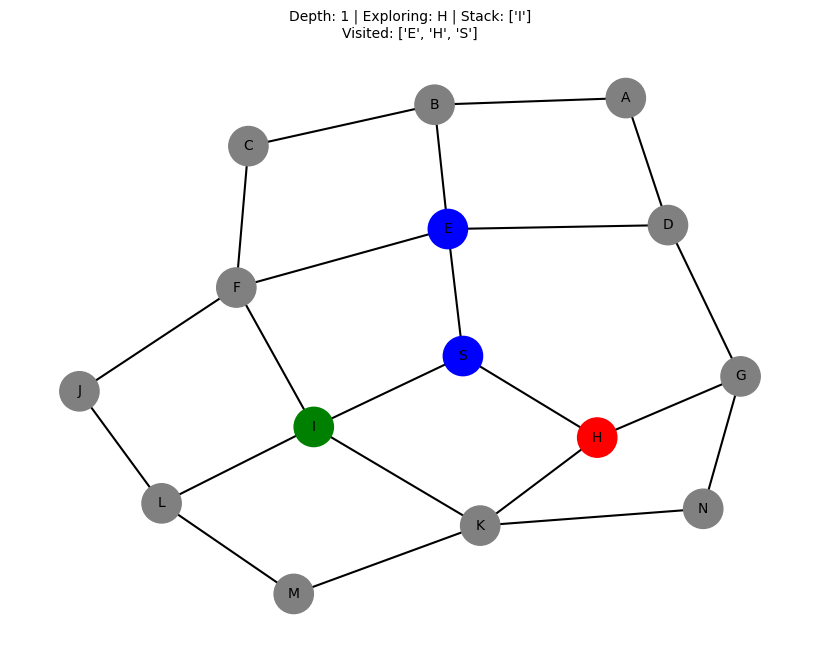

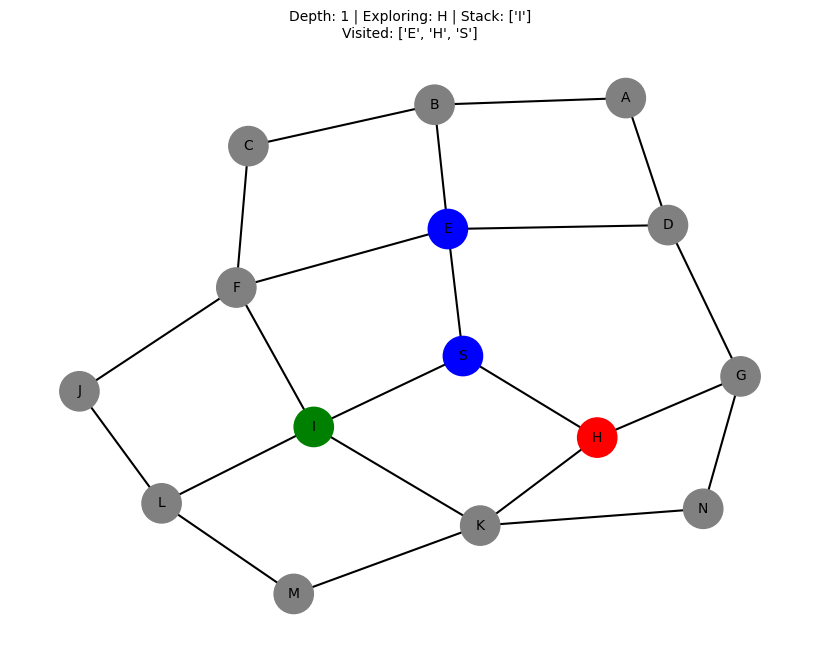

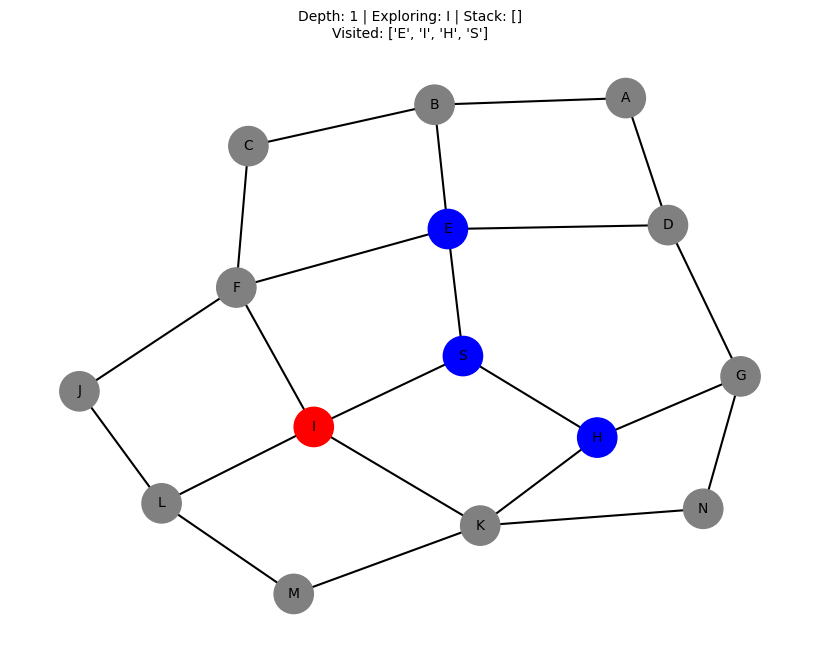

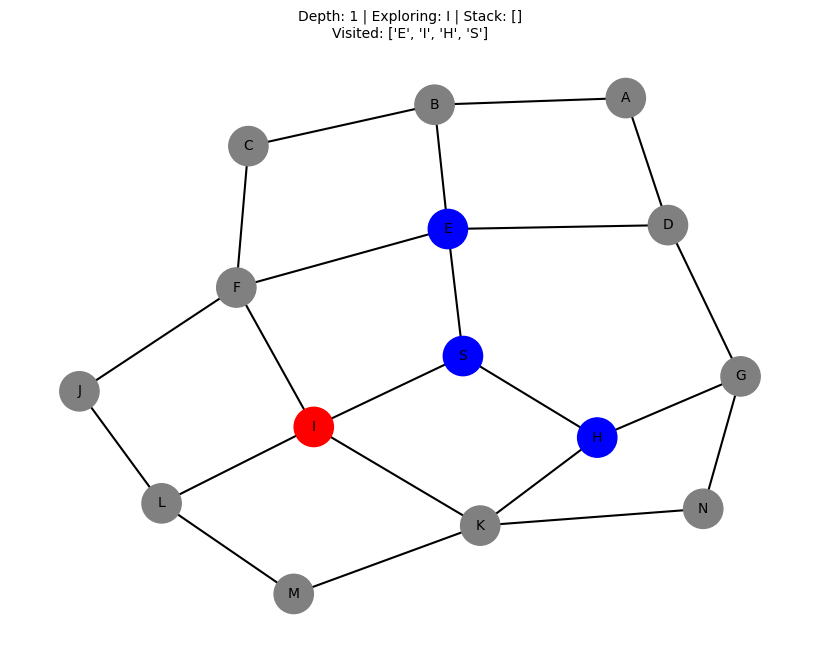


🔍 Searching with depth limit: 2


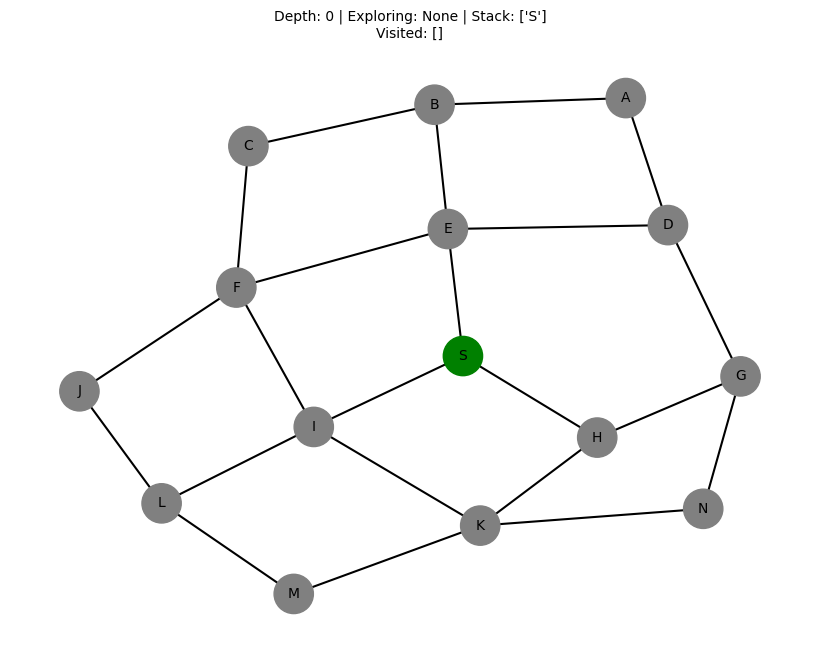

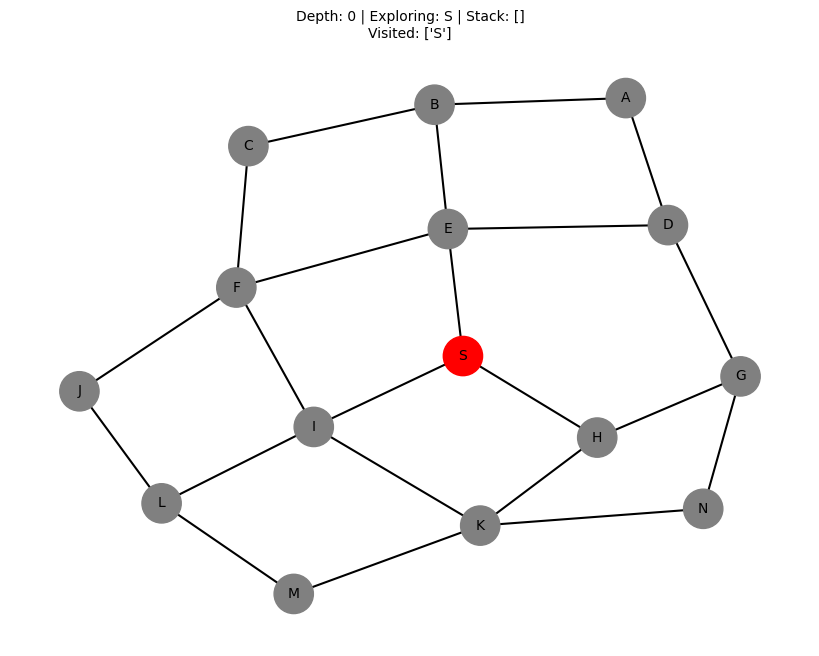

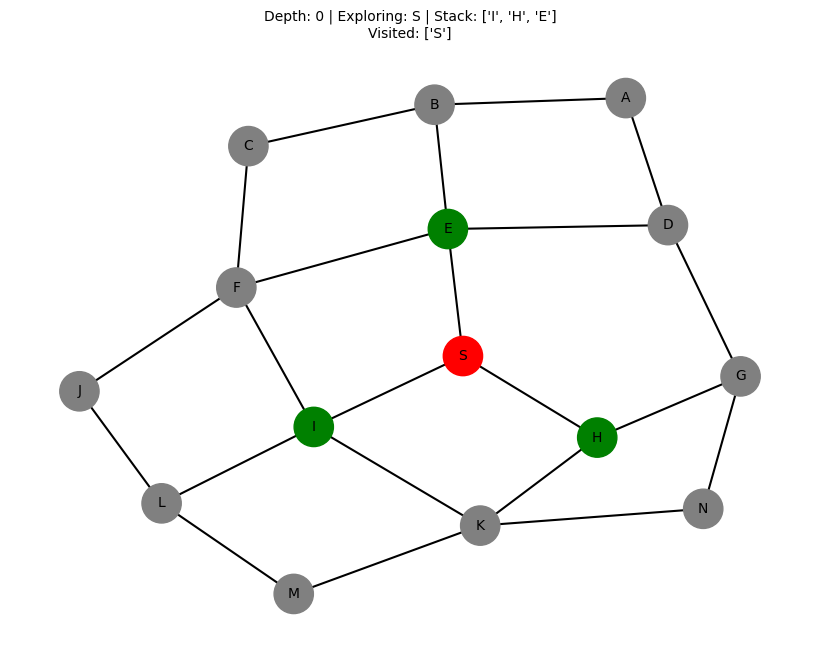

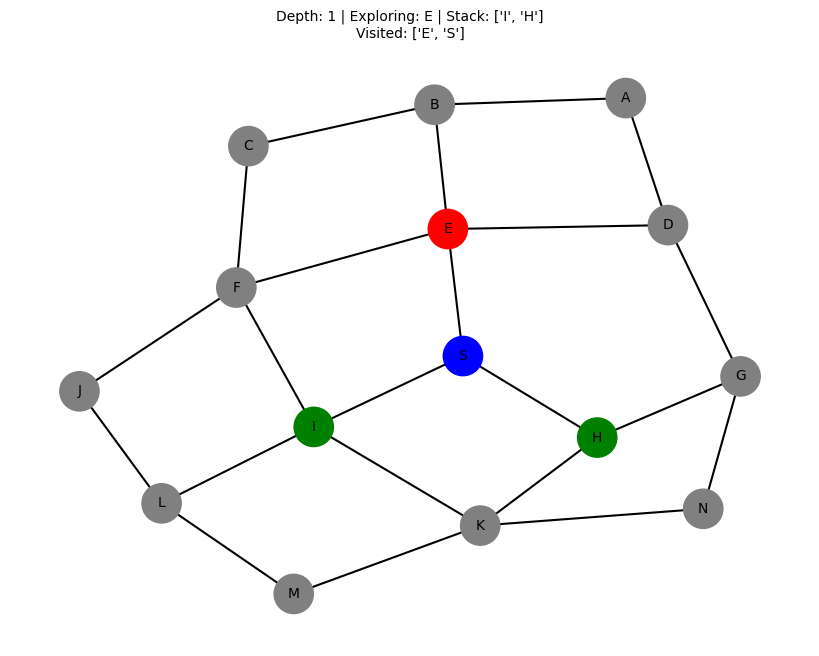

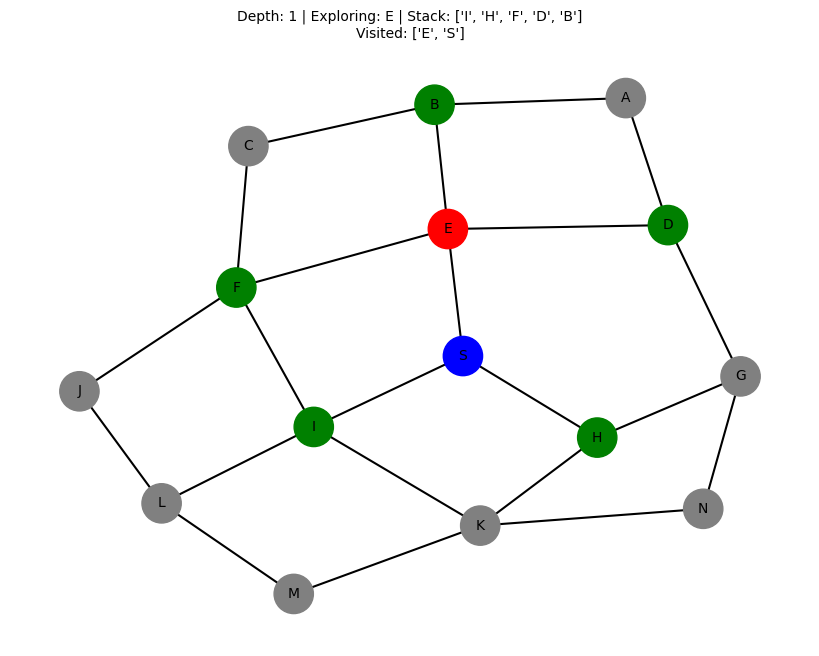

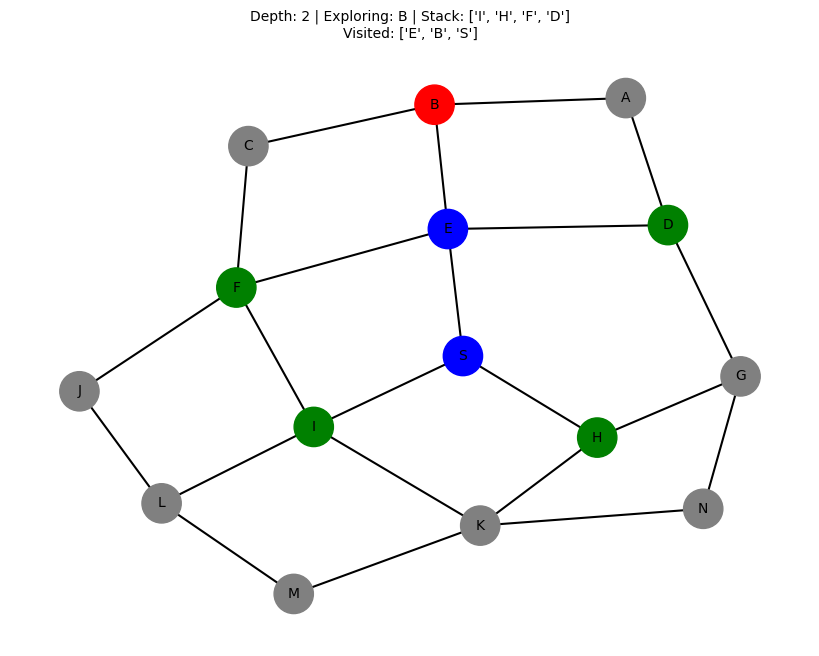

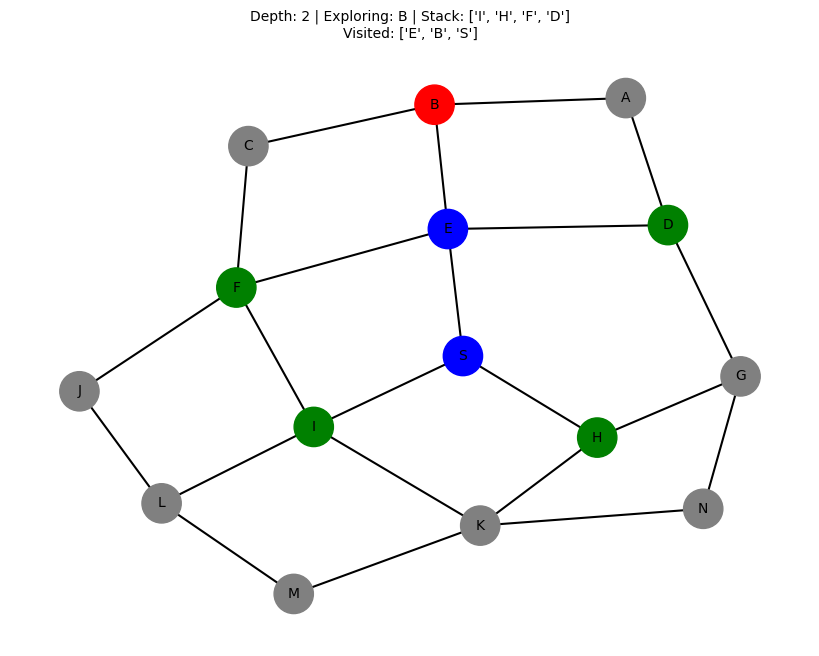

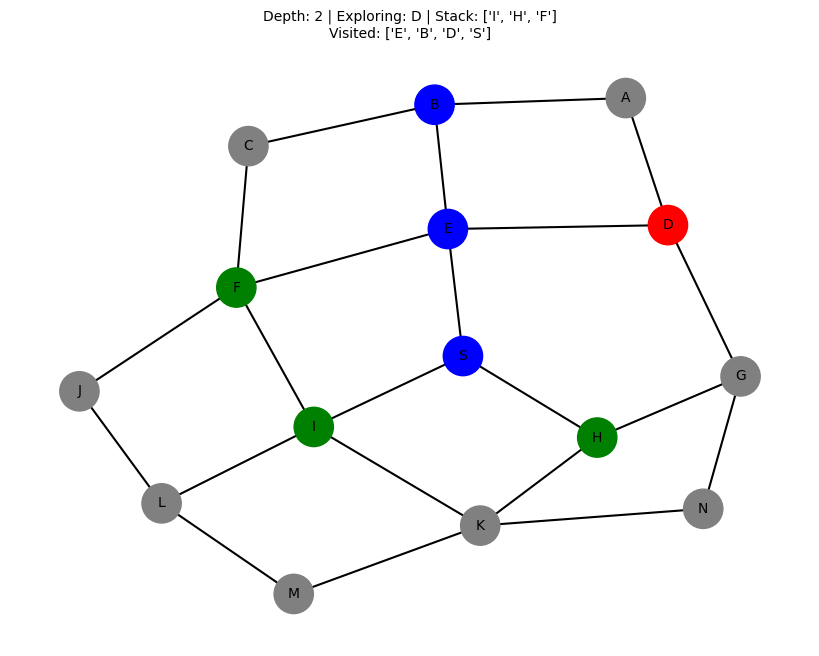

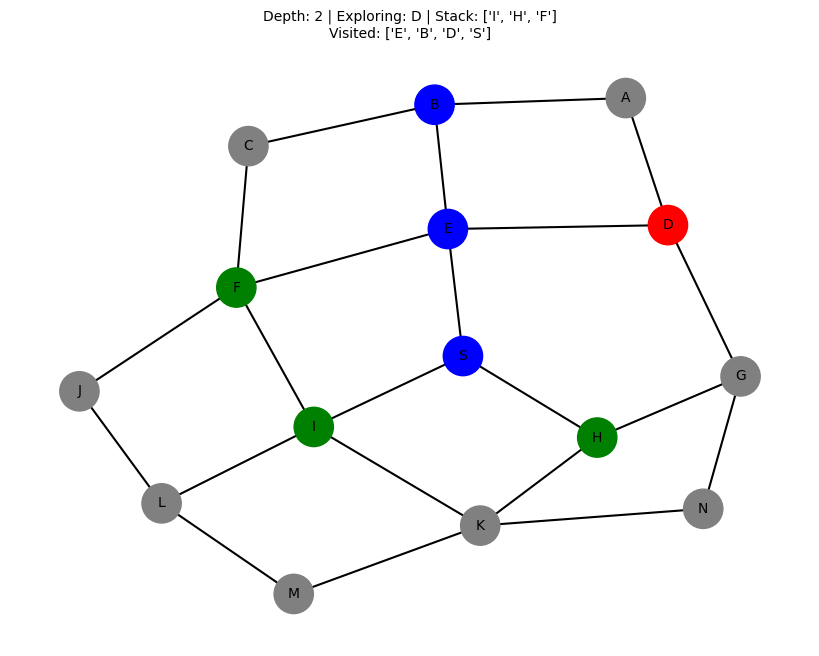

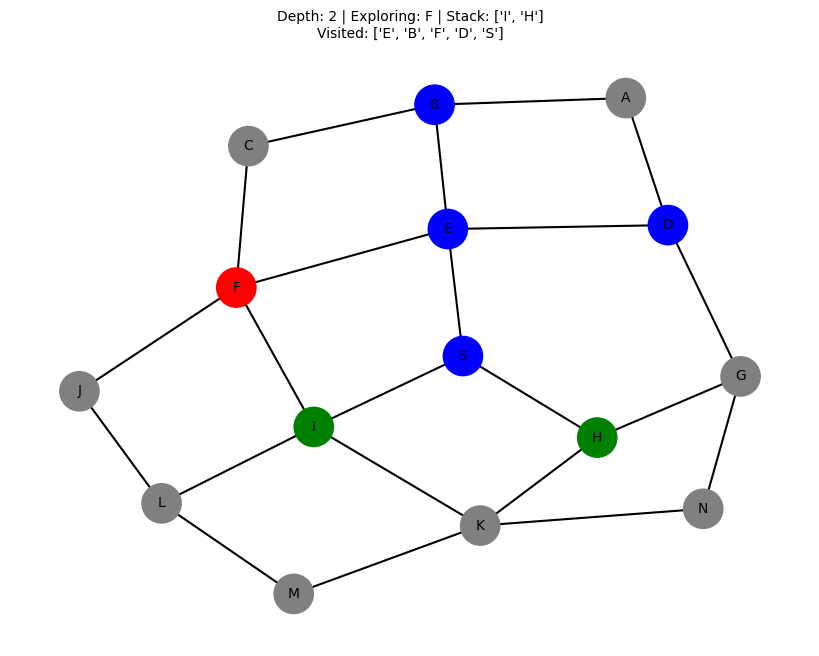

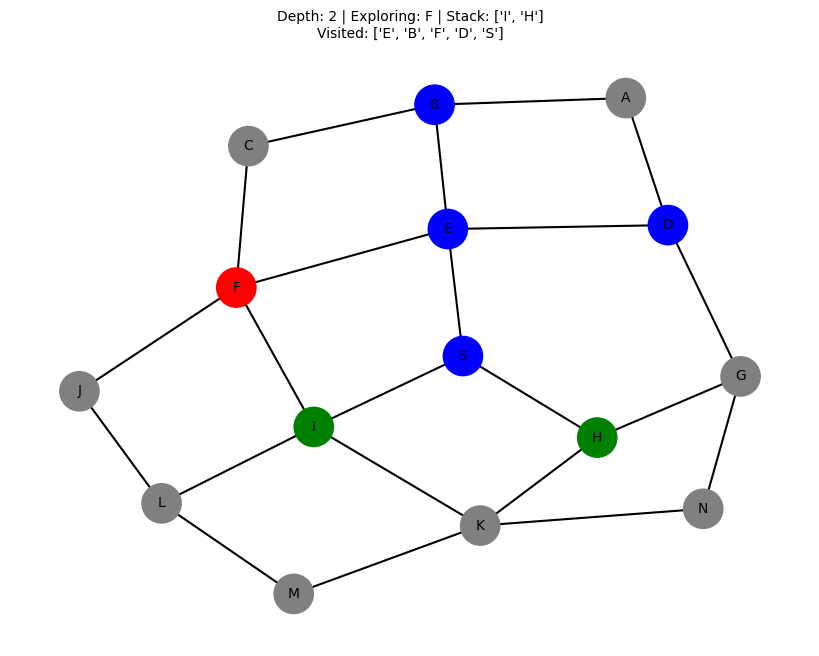

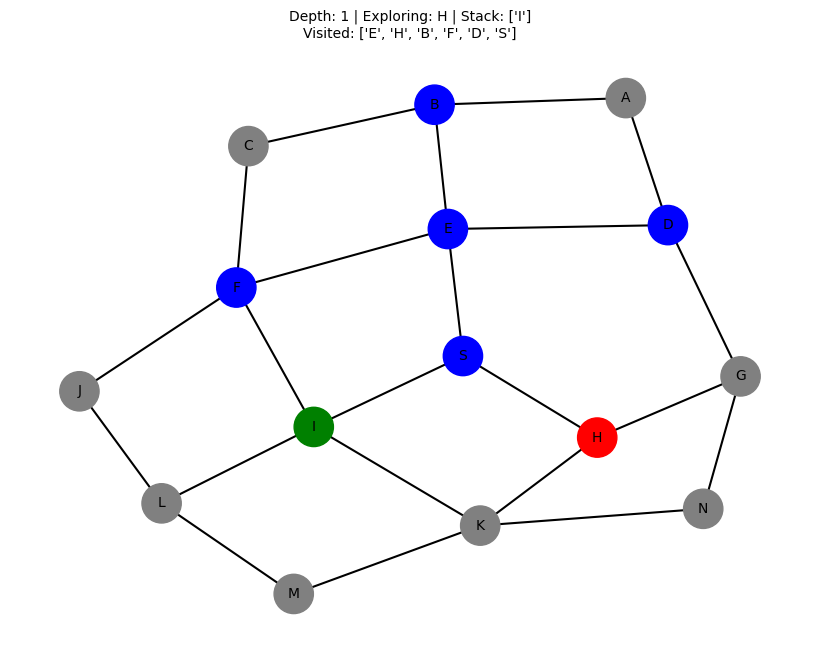

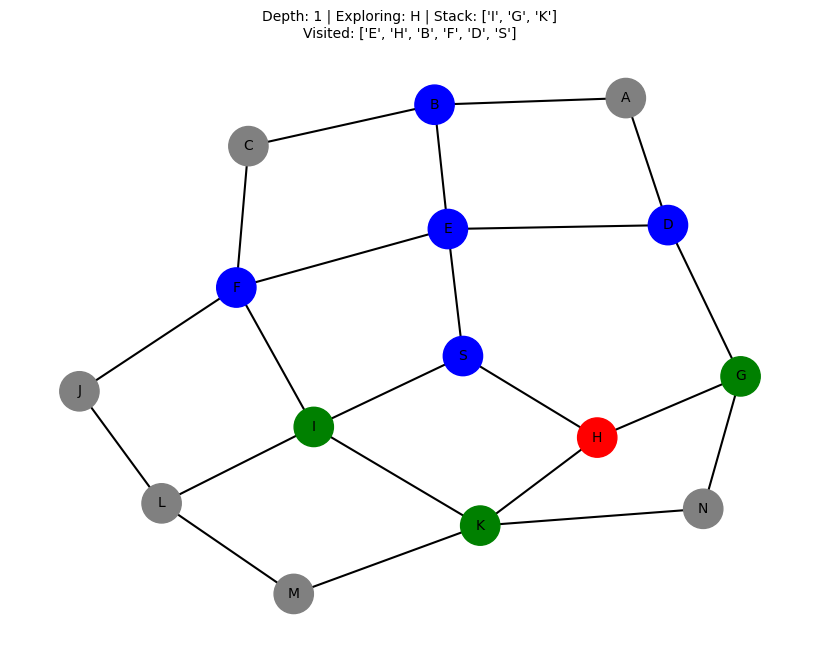

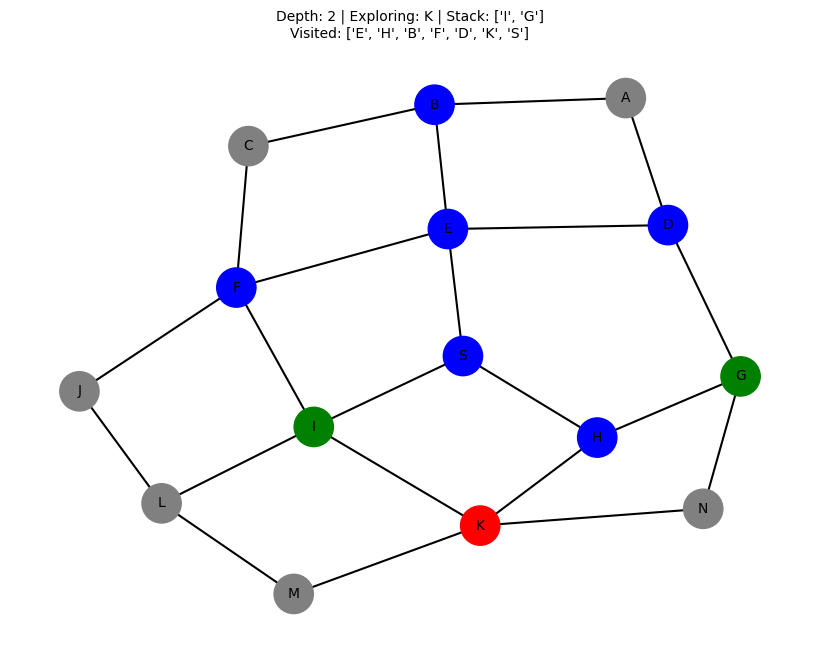

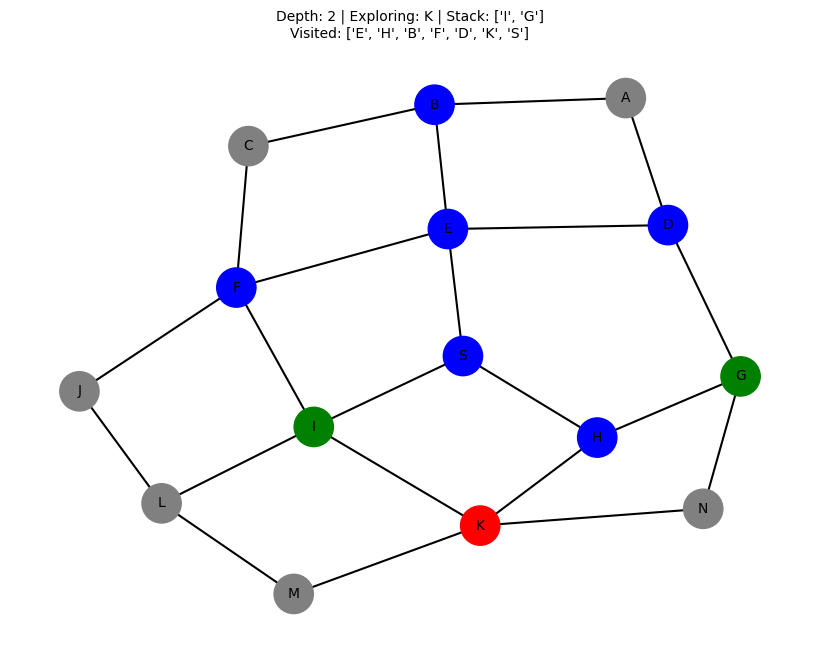

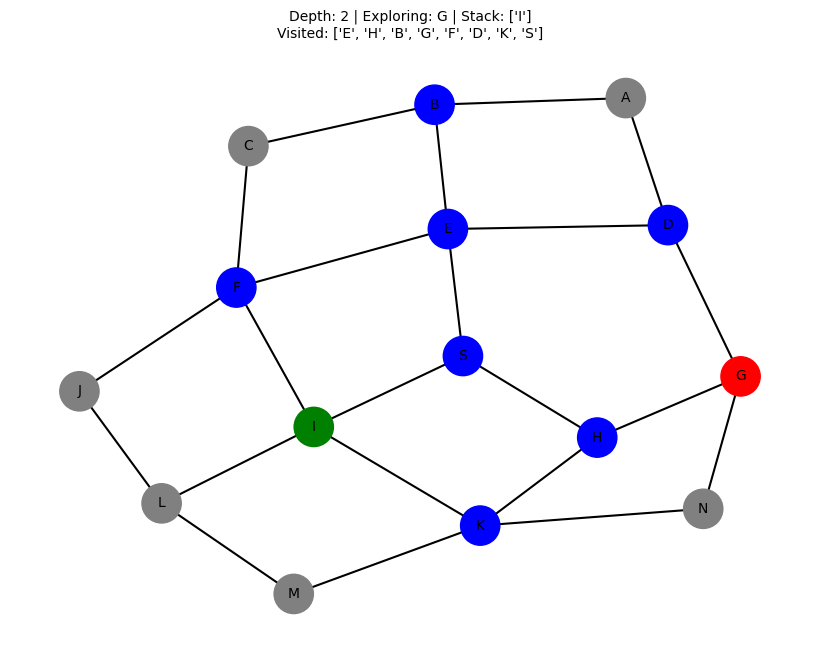

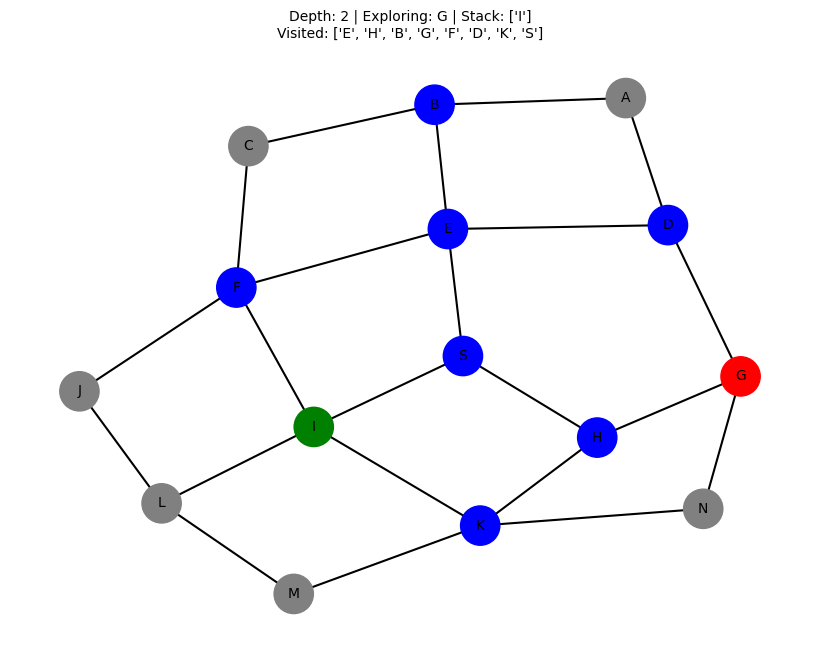

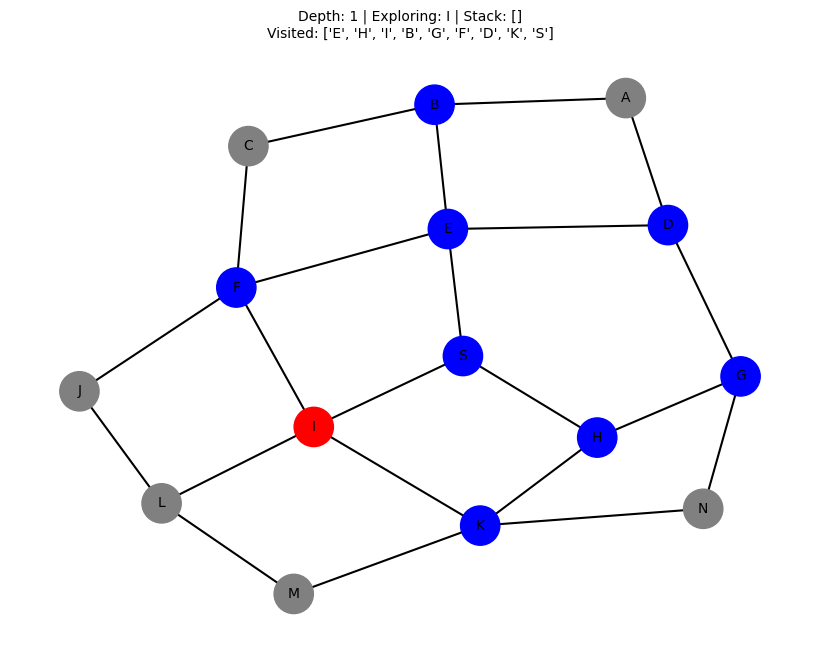

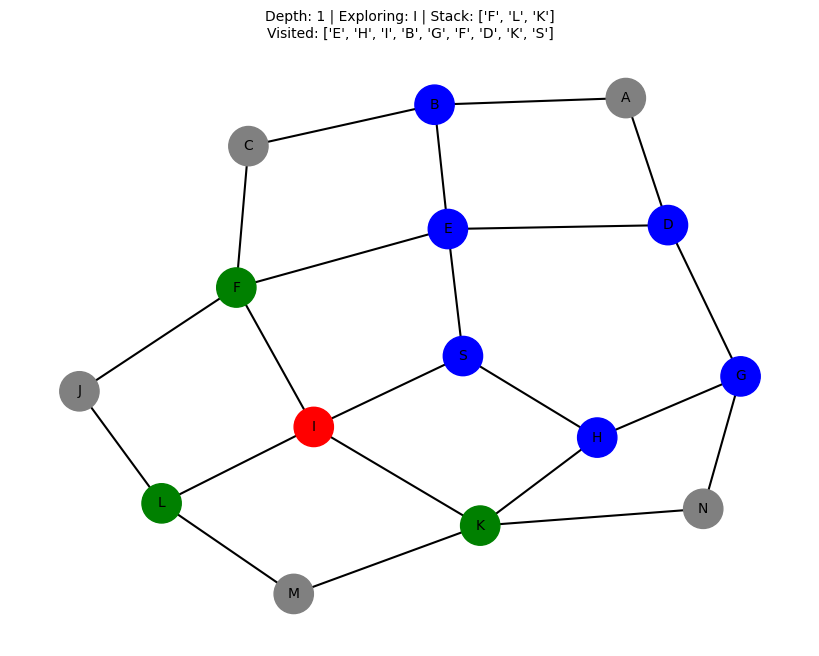

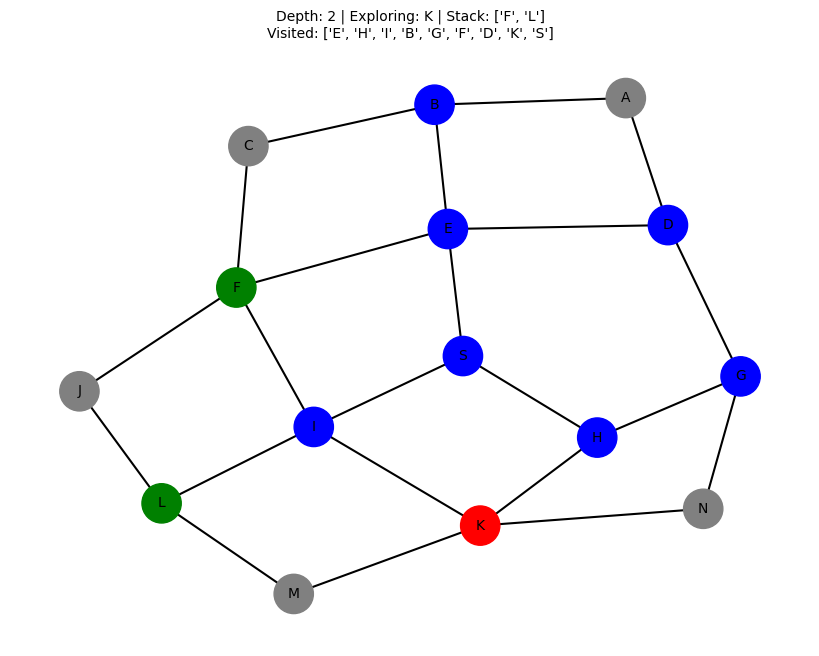

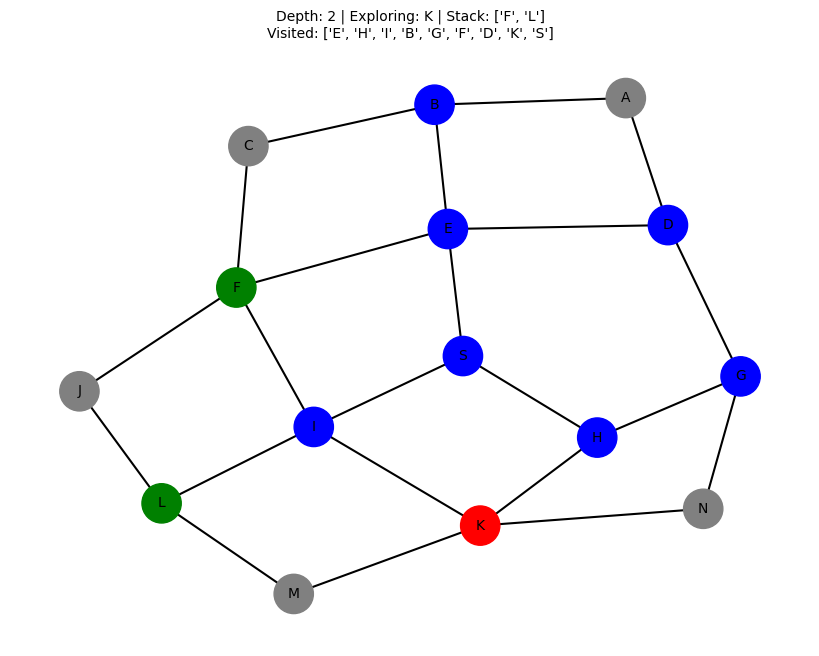

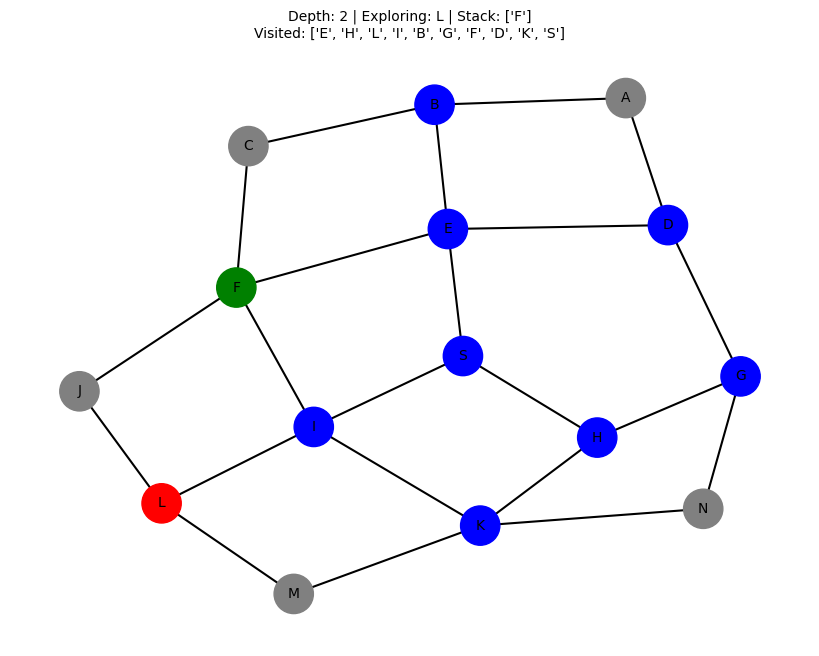

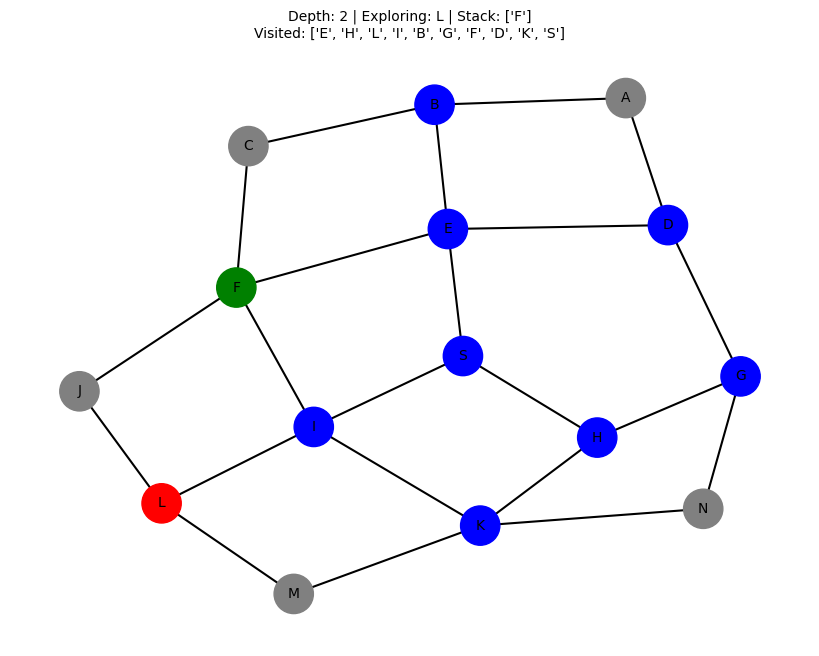

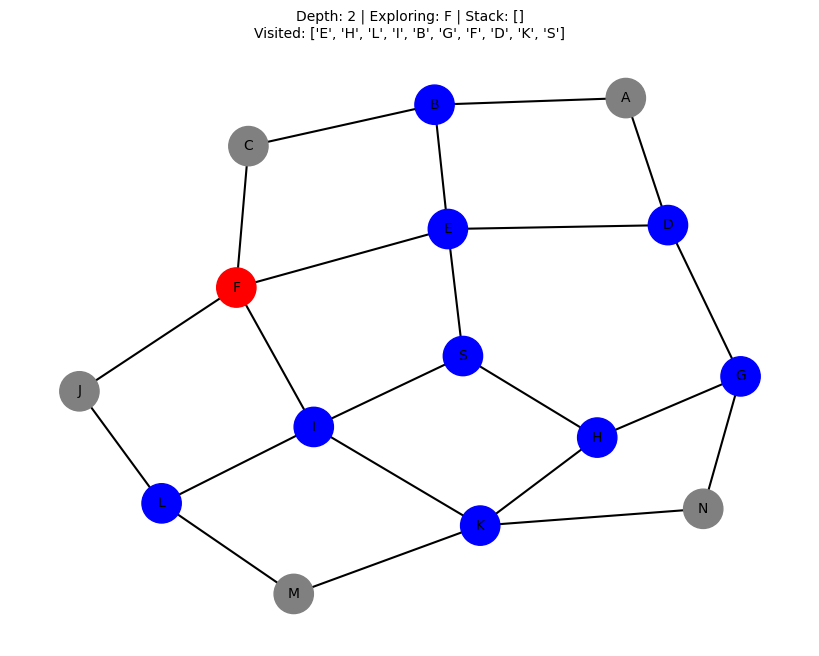

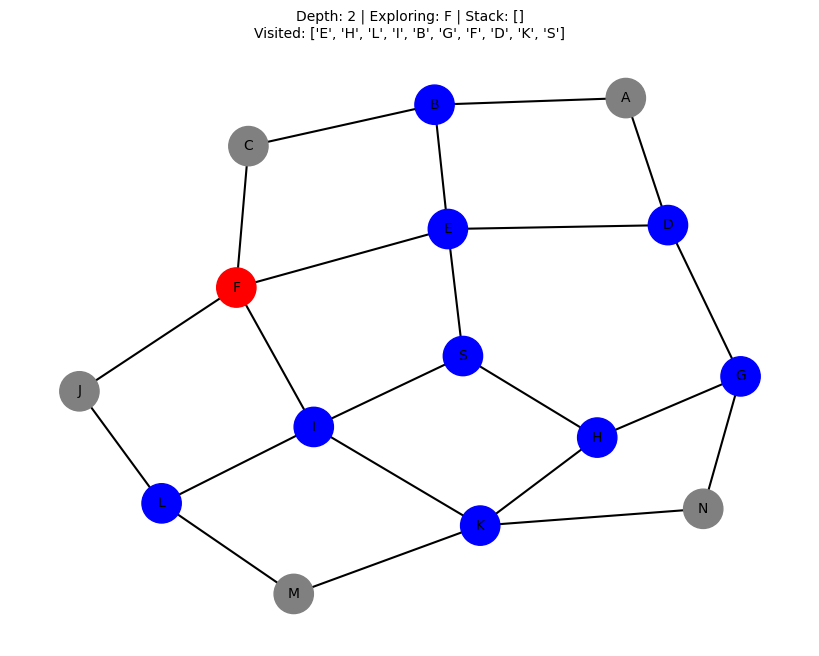


🔍 Searching with depth limit: 3


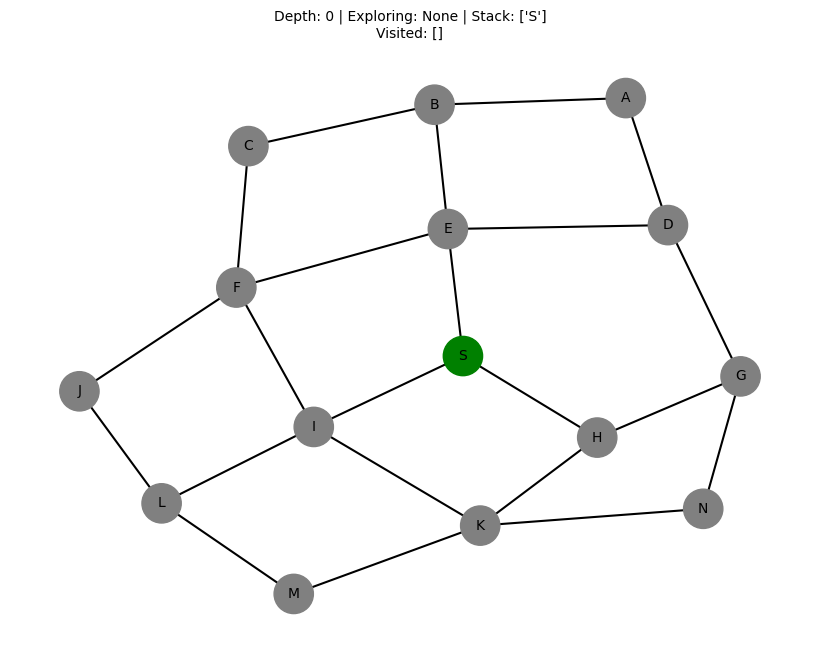

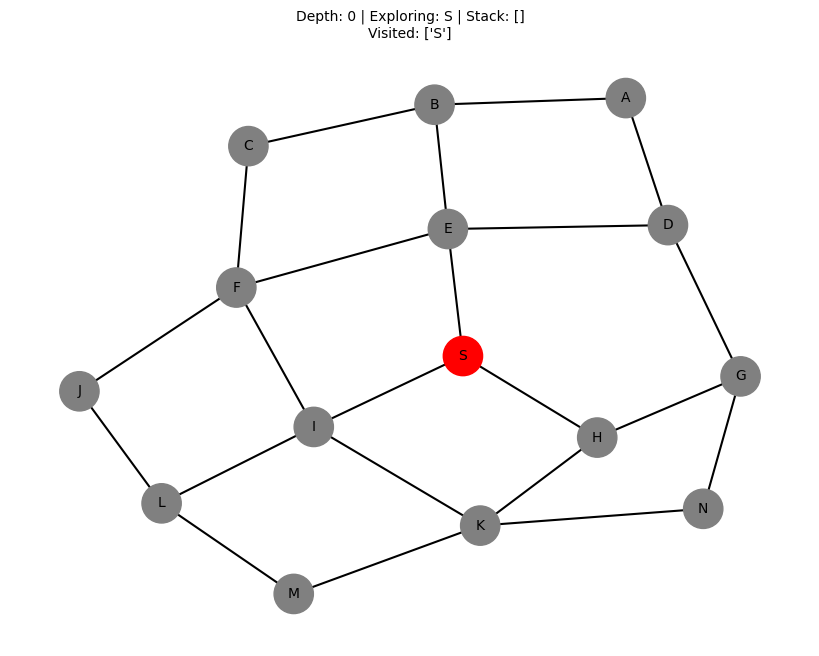

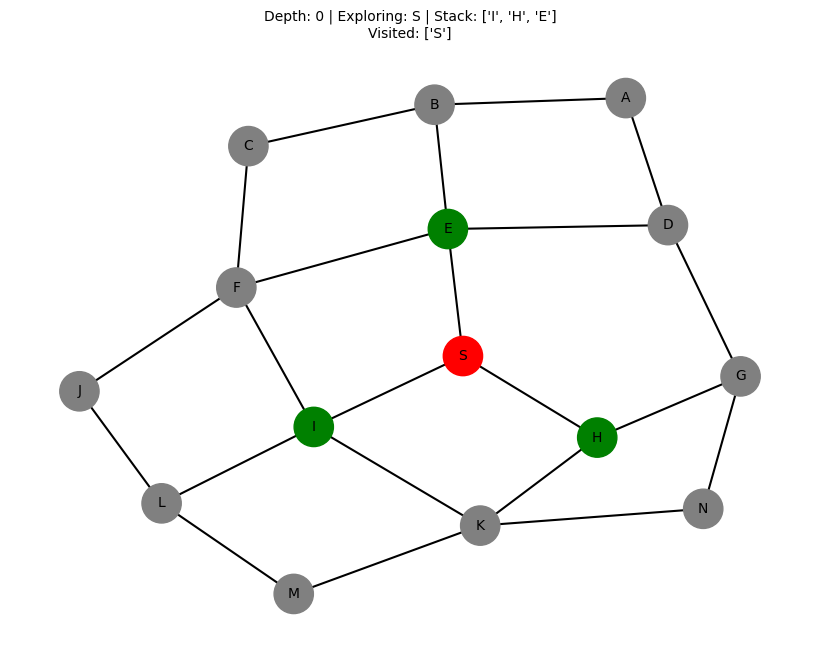

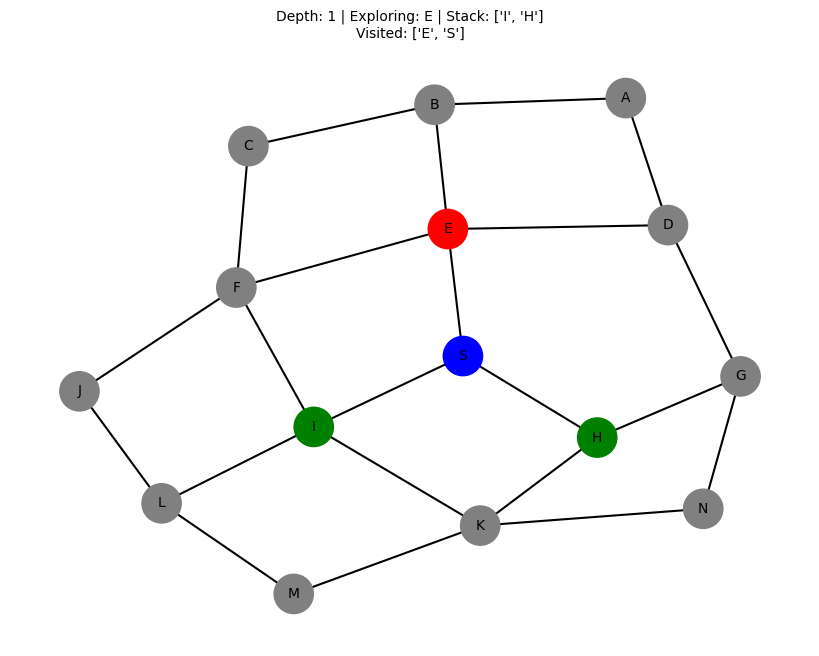

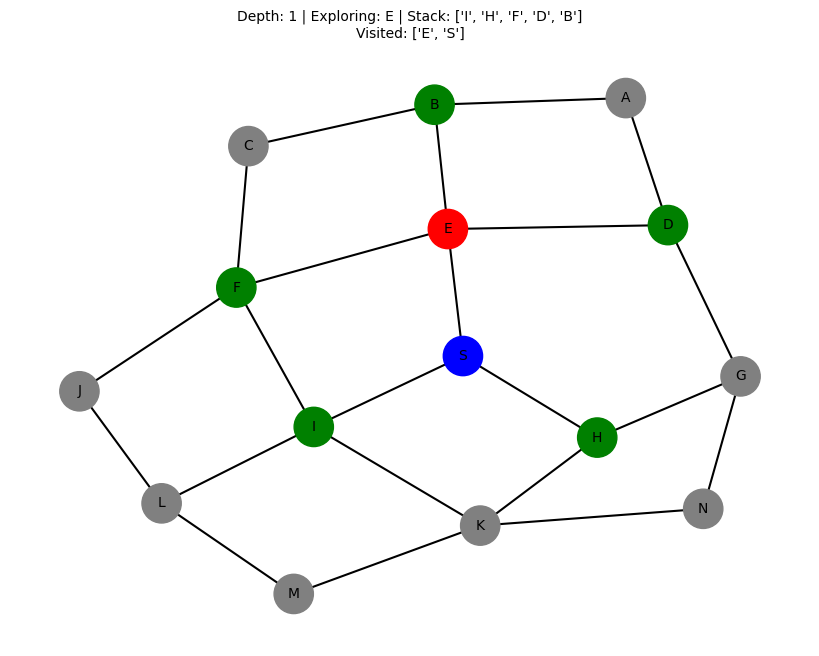

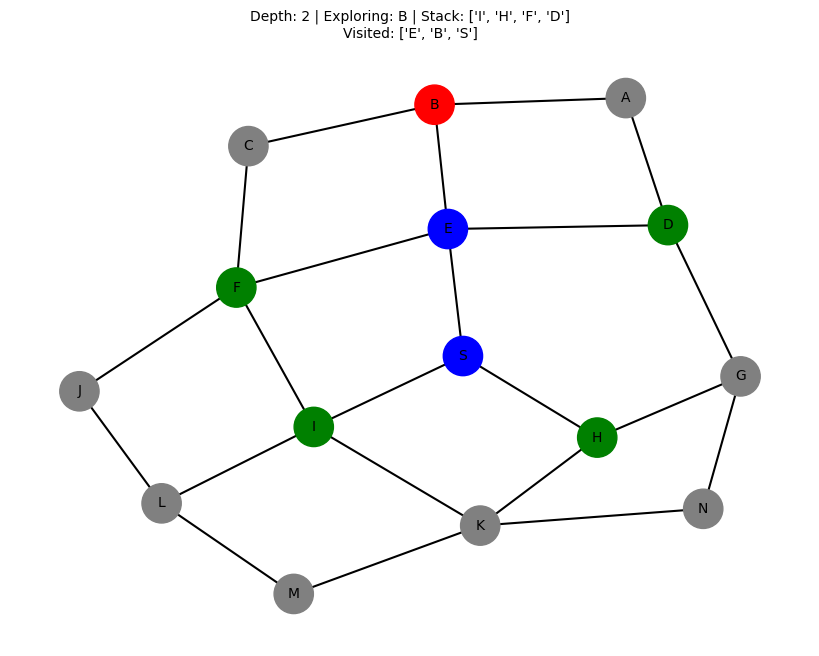

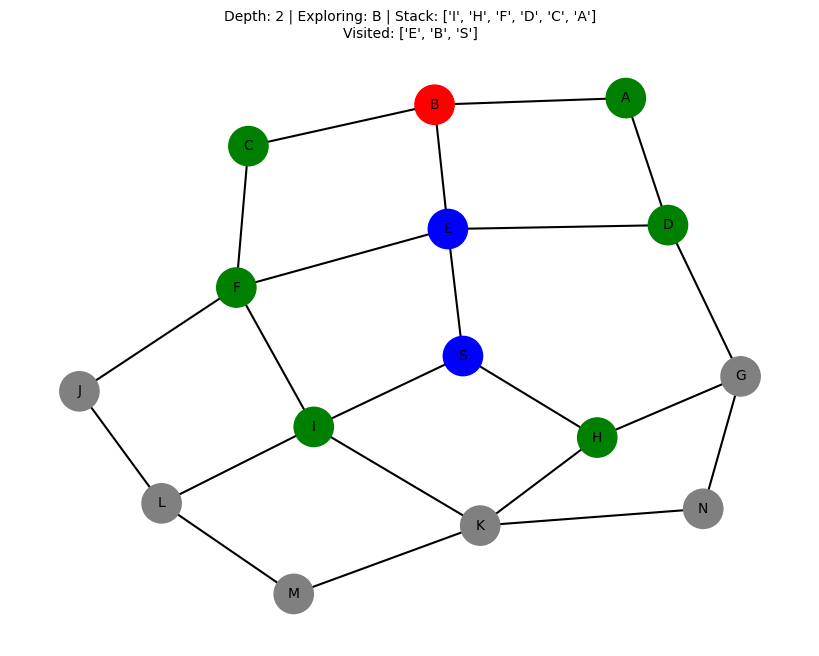

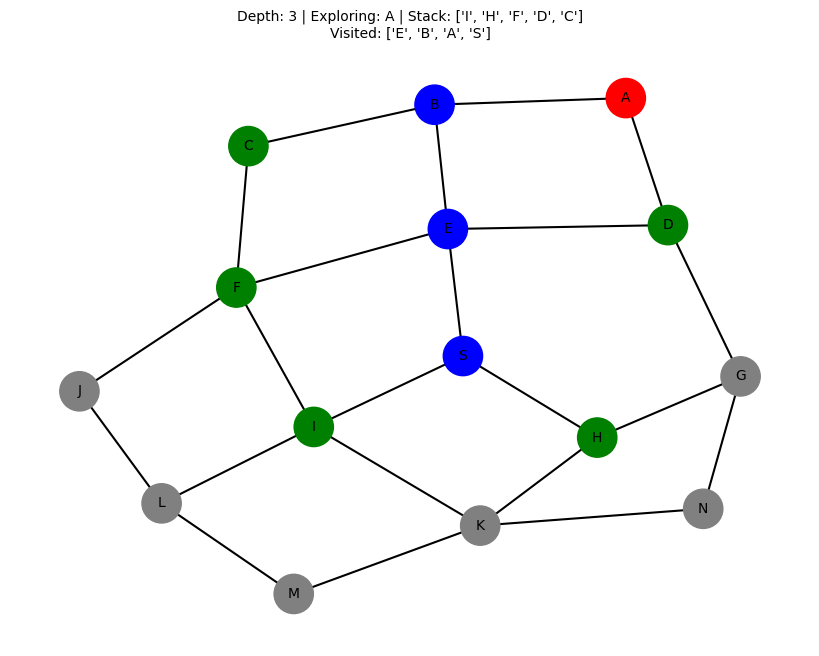

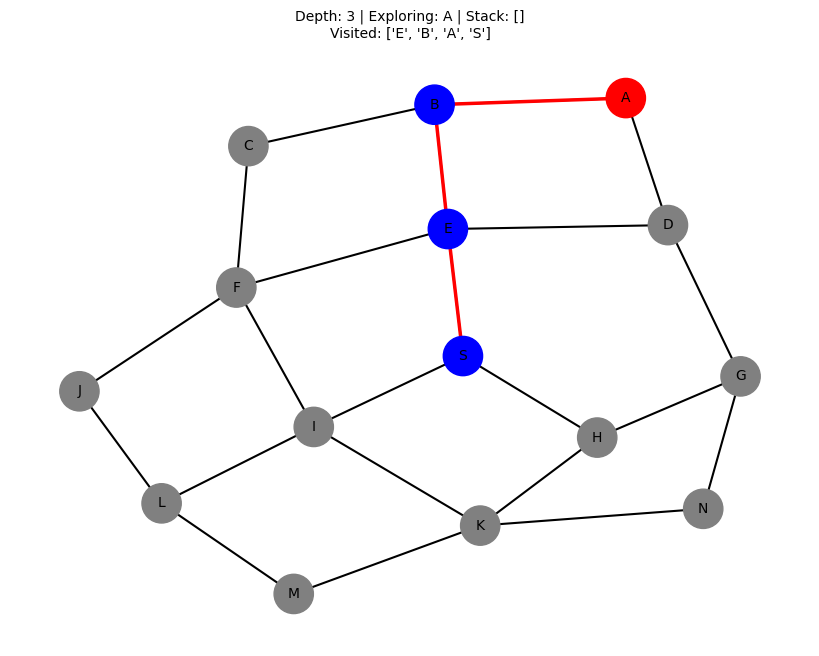


IDDFS Path Found: S → E → B → A


In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import time

# Define the graph as an adjacency list
graph = {
    'S': ['E', 'H', 'I'],
    'A': ['B', 'D'],
    'B': ['A', 'E', 'C'],
    'C': ['B', 'F'],
    'D': ['A', 'E'],
    'E': ['B', 'D', 'F'],
    'F': ['J', 'I', 'E'],
    'G': ['D', 'H', 'N'],
    'H': ['S', 'K', 'G'],
    'I': ['S', 'K', 'L', 'F'],
    'J': ['F', 'L'],
    'K': ['I', 'H', 'M', 'N'],
    'L': ['I', 'J', 'M'],
    'M': ['L', 'K'],
    'N': ['K', 'G']
}

# Create an undirected graph using NetworkX
G = nx.Graph()
for node, neighbors in graph.items():
    for neighbor in neighbors:
        G.add_edge(node, neighbor)

# Function to draw the graph at each step
def draw_graph(G, visited, stack, current, path=None, depth=0):
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G, seed=42)  # Auto layout for positioning

    # Assign colors to nodes
    node_colors = []
    for node in G.nodes():
        if node == current:
            node_colors.append('red')  # Current node being explored
        elif node in stack:
            node_colors.append('green')  # Nodes in stack (frontier)
        elif node in visited:
            node_colors.append('blue')  # Visited nodes
        else:
            node_colors.append('gray')  # Unvisited nodes

    # Draw the graph
    nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=800, edge_color="black", width=1.5, font_size=10)

    # Highlight the final path in red if found
    if path:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color="red", width=2.5)

    plt.title(f"Depth: {depth} | Exploring: {current} | Stack: {list(stack)}\nVisited: {list(visited)}", fontsize=10)
    plt.show()
    time.sleep(1)  # Pause for better visualization

# Iterative Deepening Depth-First Search (IDDFS) function with visualization
def iterative_deepening_dfs(graph, start, goal, max_depth):
    for depth in range(max_depth + 1):  # Gradually increase depth limit
        print(f"\n🔍 Searching with depth limit: {depth}")
        result = depth_limited_search(graph, start, goal, depth)
        if result == "Cutoff":
            continue  # Increase depth if goal might be deeper
        elif result is not None:
            return result  # Return the found path
    return None  # Goal not found within max depth

# Depth-Limited Search (DLS) using an iterative approach
def depth_limited_search(graph, start, goal, limit):
    stack = [(start, [start], 0)]  # (node, path, depth)
    visited = set()

    draw_graph(G, visited, [node for node, _, _ in stack], None, depth=0)  # Initial state

    while stack:
        current, path, depth = stack.pop()
        visited.add(current)

        draw_graph(G, visited, [node for node, _, _ in stack], current, depth=depth)  # Draw after popping from stack

        if current == goal:
            draw_graph(G, visited, [], current, path, depth)  # Highlight final path
            return path

        if depth < limit:  # Check depth limit
            for neighbor in reversed(graph.get(current, [])):  # Reverse for correct DFS order
                if neighbor not in path:  # Prevent cycles
                    stack.append((neighbor, path + [neighbor], depth + 1))

        draw_graph(G, visited, [node for node, _, _ in stack], current, depth=depth)  # Draw after adding neighbors

    return "Cutoff" if any(depth == limit for _, _, depth in stack) else None  # Return Cutoff or Failure

# Define start, goal, and max depth
start_node = "S"
goal_node = "A"
max_depth = 5  # Adjust the max depth limit

# Run IDDFS with Visualization
iddfs_result = iterative_deepening_dfs(graph, start_node, goal_node, max_depth)

# Print the result
if iddfs_result is None:
    print("\nIDDFS Result: Goal not found within the max depth limit")
else:
    print("\nIDDFS Path Found:", " → ".join(iddfs_result))
